## Using ODE int
In this section we will learn how to use ODE int, from the scipy integration package.

This will be important for the assignment

In [1]:
import scipy.integrate
import numpy as np
from matplotlib import pyplot as plt

$$\frac{dy}{dt} = 2t$$

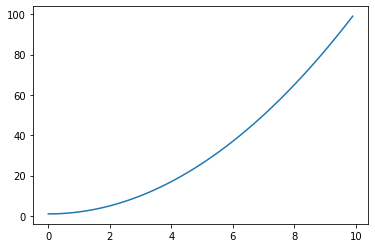

In [2]:
# setting up our timebase array
steps = 100
timestep = 0.1 # the units depend on the problem
timebase = np.arange(0,steps*timestep,timestep) # there are other ways to do this (e.g. linspace)

# defining the function
def fun(y, t):
    return 2*t

# Setting the inital value for y
y0 = 1

# Doing the integral
y = scipy.integrate.odeint(fun, y0, timebase)

# Plotting it
plt.plot(timebase, y)

# Double integrals: A falling ball
Lets try using ODE int to get the trajectory of a falling ball

$$ \ddot{x} = a $$

Split the second derivatives into two first derivatives

$$\frac{dx}{dt} = \dot{x} \qquad \frac{d\dot{x}}{dt} = a $$

Rename the dots for coding clarity

$$\frac{dx}{dt} = v \qquad \frac{dv}{dt} = a $$

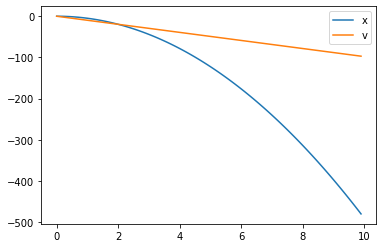

In [3]:
# setting up our timebase array
steps = 100
timestep = 0.1 # the units depend on the problem
timebase = np.arange(0,steps*timestep,timestep)

# defining the function
def fun(y, t, g):
    x,v = y # split the tuple y into its two values
    
    dxdt = v
    dvdt = g 
    
    return dxdt, dvdt # return a tuple of our derivatives

# Setting the inital value for y
y0 = 0,0

# Doing the integral
y = scipy.integrate.odeint(fun, y0, timebase, args=(-9.8,) ) # note that args wil only takes a tuple

# Plotting it
plt.plot(timebase, y[:,0], label="x")
plt.plot(timebase, y[:,1], label="v")
plt.legend()

# Spring

Lets do the same thing with the equation of motion for a spring

$$ \ddot{x} +\omega^2 x = 0 $$

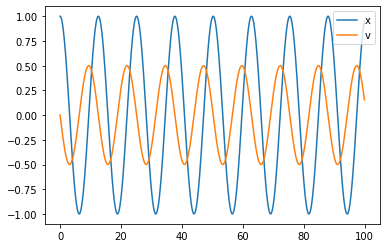

In [4]:
# setting up our timebase array
steps = 1000
timestep = 0.1 # the units depend on the problem
timebase = np.arange(0,steps*timestep,timestep)

# defining the function
def osc(y, t, w):
    x,v = y # split the tuple y into its two values
    
    dxdt = v
    dvdt = -w**2 *x
    
    return dxdt, dvdt # return a tuple of our derivatives

# Setting the inital value for y
y0 = 1,0

# Doing the integral
y = scipy.integrate.odeint(osc, y0, timebase, args=(0.5,) ) # note that args wil only takes a tuple

# Plotting it
plt.plot(timebase, y[:,0], label="x")
plt.plot(timebase, y[:,1], label="v")
plt.legend()

**Homework / Tute Work**

1) Have a look at the [course notes](https://github.com/phys3112/intro/blob/master/mcba2-numerical-integration-of-ODEs.ipynb) or the [ODEint notes](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) to get a better idea of how the ODE function works.

2) Find another set of differential equations and run them through ODE int. This is good practice for the assignment. One starting point is [wikipedia](https://en.wikipedia.org/wiki/List_of_named_differential_equations)

Here are a few examples in increasing difficulty:
* Radioactive decay
* Newton's law of cooling
* Predator–prey equations

Predetor-prey equation (Lotka–Volterra)

$$ \frac{dx}{dt} = ax - bxy $$

$$ \frac{dy}{dt} = cxy - dy $$

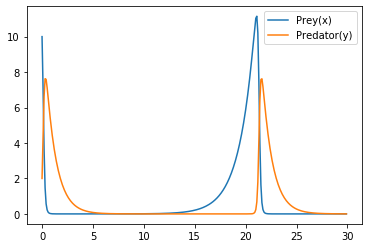

In [5]:
# setting up our timebase array
steps = 300
timestep = 0.1 # the units depend on the problem
timebase = np.arange(0,steps*timestep,timestep)

# defining the function
def predatorPrey(vec, t, a,b,c,d):
    x,y = vec # split the tuple y into its two values
    
    dxdt = a*x - b*x*y
    dydt = c*x*y - d*y
    
    return dxdt, dydt # return a tuple of our derivatives

# Setting the inital value for y
y0 = 10,2

# Doing the integral
y = scipy.integrate.odeint(predatorPrey, y0, timebase, args=(2/3,4/3,1,1) ) # note that args wil only takes a tuple

# Plotting it
plt.plot(timebase, y[:,0], label="Prey(x)")
plt.plot(timebase, y[:,1], label="Predator(y)")
plt.legend()

Text(0, 0.5, 'Predator')

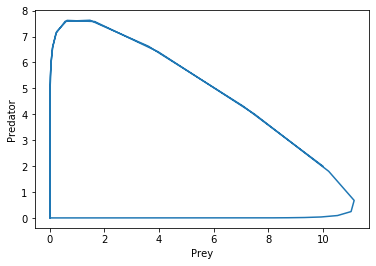

In [6]:
plt.plot(y[:,0], y[:,1])
plt.xlabel("Prey")
plt.ylabel("Predator")